In [92]:
# load dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
# connect to CryptoCompare API
api_key = os.environ.get("CryptoCompare_API_KEY")

In [12]:
def RetrieveDailyPrice(sym, comp_sym, all_data=True, exchange=''):
    url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym={}&limit=2000"\
        .format(sym.upper(), comp_sym.upper())
    
    if exchange:
        url += f'&e={exchange}'
        
    url += f"&api_key={api_key}"
    
    response = requests.get(url)
    data = response.json()["Data"]
    
    if not data:
        return pd.DataFrame()
    
    crypto_df = pd.DataFrame(data["Data"])
        
    return crypto_df

In [13]:
cryp_dict = {}

ftx_collapse = pd.to_datetime("2022-11-11")
start = ftx_collapse - datetime.timedelta(days=14)
end = ftx_collapse + datetime.timedelta(days=14)

In [21]:
sym = "DOGE"
cur_sym_df = RetrieveDailyPrice(sym, "USD")

cur_sym_df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1502323200,0.002180,0.001843,0.001914,7057551.95,13563.00,0.001934,direct,
1,1502409600,0.001957,0.001800,0.001934,5449093.37,10170.41,0.001871,direct,
2,1502496000,0.001998,0.001745,0.001871,3301406.86,6192.27,0.001854,direct,
3,1502582400,0.001883,0.001405,0.001854,6449974.80,11409.45,0.001779,direct,
4,1502668800,0.001909,0.001688,0.001779,6337540.17,11084.22,0.001754,direct,


In [22]:
cur_sym_df["time"] = pd.to_datetime(cur_sym_df["time"], unit='s')
cur_sym_clean_df = cur_sym_df[["time", "open", "close", "low", "high"]]

cur_sym_clean_df["return"] = (cur_sym_clean_df["close"] -
                              cur_sym_clean_df["open"]) / cur_sym_clean_df["open"]

cur_sym_nar_df = cur_sym_clean_df.loc[(cur_sym_clean_df["time"] >= start) &
                                      (cur_sym_clean_df["time"] <= end), :]

cryp_dict[sym] = [cur_sym_nar_df, cur_sym_nar_df["return"].mean()]

/var/folders/m6/5m5yr4vx1hnfwqqw70nydyqr0000gn/T/ipykernel_39072/2012847471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_sym_clean_df["return"] = (cur_sym_clean_df["close"] -


In [39]:
# create a dataframe and sort it by descending average daily return
# to retrieve the 25 best performing coins for the period of interest
avg_ret = [value[1] for value in cryp_dict.values()]

hi_ret_df = pd.DataFrame({"Symbol" : cryp_dict.keys(), 
              "Average Daily Return" : [value[1] for value in cryp_dict.values()]
             }).sort_values("Average Daily Return", ascending=False).reset_index(drop=True).head(25)

In [43]:
hi_ret_df

,Symbol,Average Daily Return
0,DOGE,0.011276
1,BTC,-0.006172
2,ETH,-0.006217


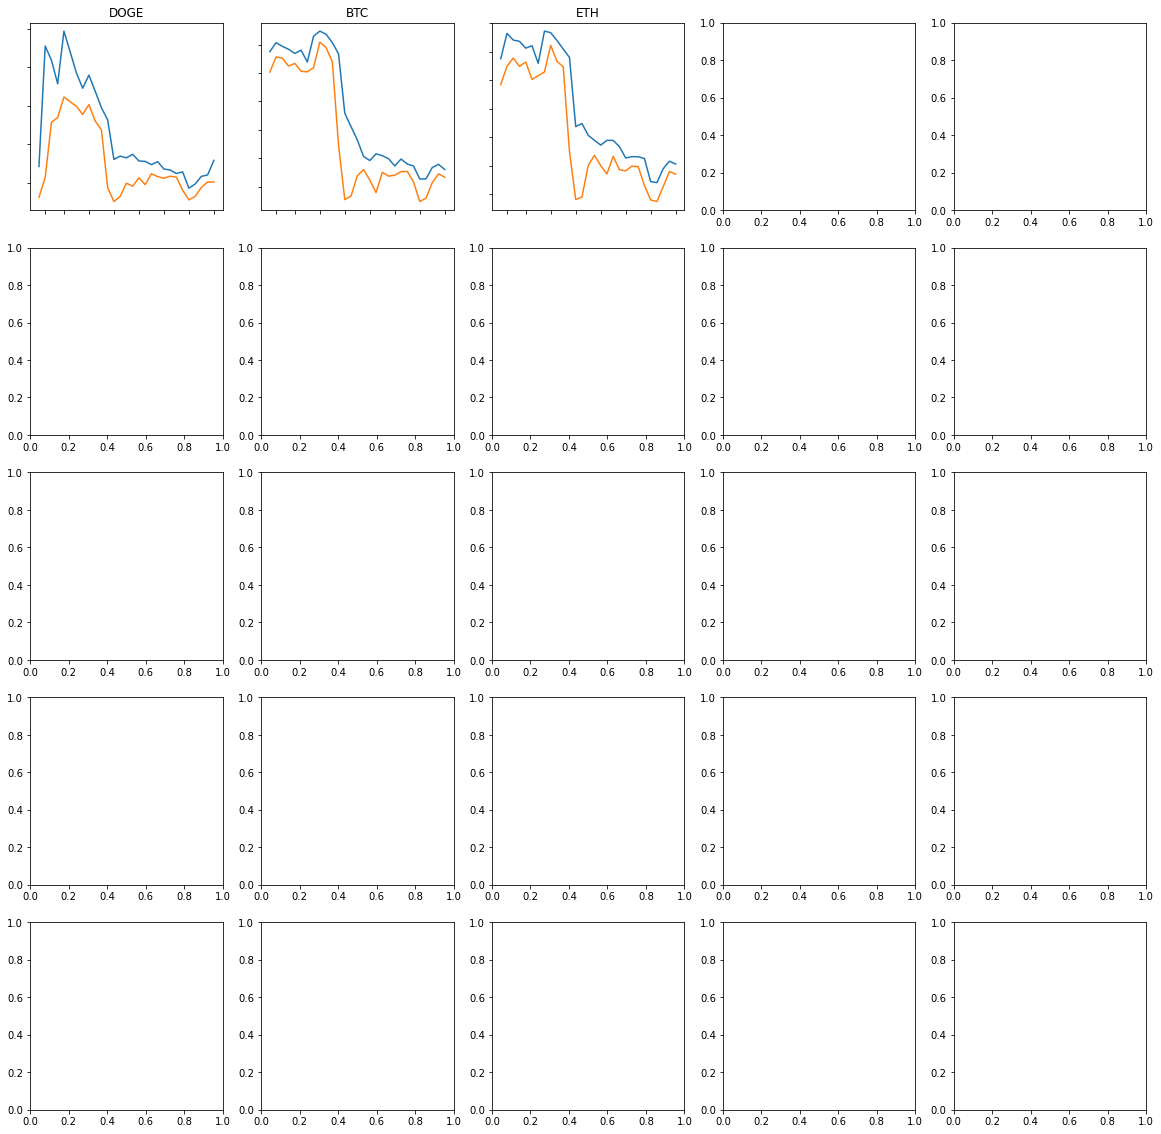

In [85]:
# initiate the figure and axis with 23 subplots in a vertical line
fig, ax = plt.subplots(5,5, figsize=(20, 20))

i = 0
j = 0

for sym in hi_ret_df["Symbol"]:
    cryp_dict[sym][0]
    
    ax[i, j].plot(cryp_dict[sym][0]["time"], cryp_dict[sym][0]["high"])
    ax[i, j].plot(cryp_dict[sym][0]["time"], cryp_dict[sym][0]["low"])
    ax[i, j].set_title(sym)
    ax[i, j].tick_params(which='both',      # both major and minor ticks are affected
                         right=False,
                         left=True,
                         bottom=True,      # ticks along the bottom edge are off
                         top=False,         # ticks along the top edge are off
                         labelbottom=False,
                         labelleft=False)
    
    if j < 5:
        j += 1
    else:
        i += 1

In [86]:
# close the plots
plt.close("all")

In [103]:
fig = make_subplots(rows=5, cols=5, start_cell="top-left")

i = 1
j = 1

for sym in hi_ret_df["Symbol"]:
    
    fig.add_trace(go.Candlestick(x=cryp_dict[sym][0]["time"],
                                 open=cryp_dict[sym][0]["open"], high=cryp_dict[sym][0]["high"],
                                 low=cryp_dict[sym][0]["low"], close=cryp_dict[sym][0]["close"]),
                  row=i, col=j)
    
    if j < 5:
        j += 1
    else:
        i += 1

fig

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
sns.set_theme(style="white")